In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [148]:
nyc_data = pd.read_csv('../data/nyc_without_featureselection.csv')
nyc_data.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,1,5.010635,1,9,0.21,6,365
1,2845,2,127,0,5.420535,1,45,0.38,2,355
2,4632,2,94,1,5.017280,3,0,0.00,1,365
3,4869,1,41,0,4.499810,1,270,4.64,1,194
4,7192,2,61,0,4.394449,10,9,0.10,1,0


In [149]:
nyc_data.shape

(48895, 10)

In [150]:
new_york_data = nyc_data.drop(['host_id'], axis=1)


In [151]:
new_york_data.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.675345,107.122732,0.504060,4.736885,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.735816,68.743096,0.545379,0.695344,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,51.000000,0.000000,4.248495,1.000000,1.000000,0.040000,1.000000,0.000000
50%,2.000000,94.000000,0.000000,4.672829,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.000000,178.000000,1.000000,5.170484,5.000000,24.000000,1.580000,2.000000,227.000000
max,4.000000,220.000000,2.000000,9.210440,1250.000000,629.000000,58.500000,327.000000,365.000000


In [152]:
new_york_data.shape

(48895, 9)

#### Neighbourhood Distribution

Text(0.5, 1.0, 'Numbers in Each Neigbourhoods')

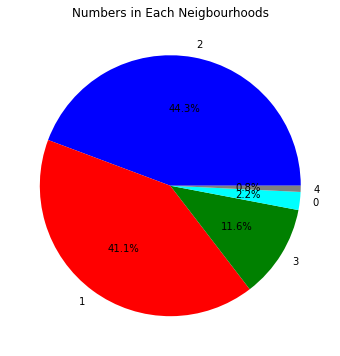

In [153]:
plt.figure(figsize=(6,6))
numbers = new_york_data['neighbourhood_group'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in Each Neigbourhoods')

In [154]:
categories = new_york_data.select_dtypes(include=['object']).columns

for i in categories:
  data[i] = LabelEncoder().fit_transform(data[i])


new_york_data.dtypes

neighbourhood_group                 int64
neighbourhood                       int64
room_type                           int64
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [155]:
data = new_york_data.reset_index(drop=True)

new_york_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,5.010635,1,9,0.21,6,365
1,2,127,0,5.420535,1,45,0.38,2,355
2,2,94,1,5.017280,3,0,0.00,1,365
3,1,41,0,4.499810,1,270,4.64,1,194
4,2,61,0,4.394449,10,9,0.10,1,0


In [156]:
X = new_york_data.drop(columns=['price'])
y = new_york_data['price']

columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"There are {X_train.shape[0]} traning data")
print(f"There are {X_test.shape[0]} test data")


X.head()

There are 39116 traning data
There are 9779 test data


,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.917828,0.012762,0.909359,-0.293996,-0.320414,-0.551511,-0.034716,1.916250
1,0.441222,0.289156,-0.924247,-0.293996,0.487665,-0.445079,-0.156104,1.840275
2,0.441222,-0.190897,0.909359,-0.196484,-0.522433,-0.682986,-0.186451,1.916250
3,-0.917828,-0.961892,-0.924247,-0.293996,5.538156,2.221978,-0.186451,0.617065
4,0.441222,-0.670950,-0.924247,0.144807,-0.320414,-0.620379,-0.186451,-0.856865


In [157]:
X.shape

(48895, 8)

#### KNeighbourRegressor

In [158]:
# Before Hyperparameter Tuning
knn_regressor = KNeighborsRegressor(4, metric="euclidean")
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: 0.24498333053146032
Mean Absolute Error: 0.36074443417463503
Root Mean Absolute Error: 0.4949579078380911
R2 score: 0.4821608301125604


In [159]:
print(y_test)

879      4.499810
44383    3.433987
15394    4.795791
43230    6.154858
16332    5.298317
           ...   
20477    5.375278
44969    4.615121
36577    4.262680
11477    6.216606
1023     4.836282
Name: price, Length: 9779, dtype: float64


#### KNeighbourRegressor with K Fold

In [160]:
knn = KNeighborsRegressor( metric="euclidean")
mse = cross_val_score(knn, X, y,cv=10, scoring='neg_mean_squared_error').mean()
mae = cross_val_score(knn, X, y,cv=10, scoring='neg_mean_absolute_error').mean()
r2_knn = cross_val_score(knn, X, y,cv=10, scoring='r2').mean()
rmse = np.sqrt(abs(mse.mean()))

print("Mean Squared Error: {}".format(abs(mse)))
print("Mean Absolute Error: {}".format(abs(mae)))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2_knn))

Mean Squared Error: 0.26840341272575047
Mean Absolute Error: 0.3754451228913475
Root Mean Absolute Error: 0.5180766475394838
R2 score: 0.4340805179750893


In [161]:
prediction = {'KNN-Default': y_pred}

In [162]:
predictions_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'KNN-Default': y_pred.flatten()}).head(20)
predictions_list.set_index('Actual Values', inplace=True)
predictions_list

,KNN-Default
Actual Values,
4.499810,4.966280
3.433987,4.230107
4.795791,4.344112
6.154858,5.779445
5.298317,5.161966
5.141664,4.822159
4.510860,4.146113
4.110874,4.415068
5.017280,5.312662


In [163]:
error_dict = {'KNN Default': [mse, r2]}
error_list = pd.DataFrame()
error_list['KNN Default'] = [mse, r2]
error_list.reset_index(inplace=True, drop=True)
#error_list.rename(columns={0: 'MSE KNN Default'}, inplace=True)
error_list.index =['Mean Squared Error', 'R2 Score']
error_list.T

,Mean Squared Error,R2 Score
KNN Default,-0.268403,0.482161


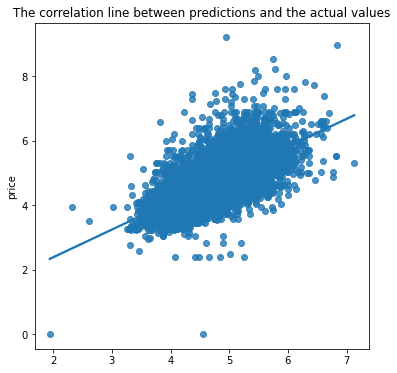

In [164]:
plt.figure(figsize=(6,6))
sns.regplot(y_pred, y_test)
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [165]:
def plot_all_r2():
  length = len(prediction)
  xcol = 2
  if length < 2:
    xcol = length % 2
  
  xrow = 1
  if(length > 2):
    xrow = int(length / 2) 
    if length % 2 != 0:
      xrow+=1
  
  fig, axes = plt.subplots(xrow, xcol, figsize=( 16, 3 * length))
  for ax, key in zip(axes.flatten(), prediction.keys()):
    sns.regplot(prediction[key], y_test, ax=ax)
    ax.set_title("The correlation line in {}".format(key))
  plt.show()

In [166]:
#Hyperparameter tuning for KNN
param_grid = {'p': [1, 2],  
              'n_neighbors' : [ 5, 10, 15]
              } 

grid_knn_regressor = GridSearchCV(KNeighborsRegressor(n_jobs=-1), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error") 

grid_knn_regressor.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [167]:
print(f"Best parameters are {grid_knn_regressor.best_params_}") 
print("Best score is {}".format(grid_knn_regressor.best_score_ * -1))
print("Best model is {}".format(grid_knn_regressor.best_estimator_))


Best parameters are {'n_neighbors': 15, 'p': 1}
Best score is 0.23919266784690613
Best model is KNeighborsRegressor(n_jobs=-1, n_neighbors=15, p=1)


#### KNeighbourRegressor after Hyperparameter tuning

In [168]:
knr_best_value = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')
knr_best_value.fit(X_train, y_train)
y_pred_best = knr_best_value.predict(X_test)

mse_knn_best_value = mean_squared_error(y_pred_best, y_test)
mae_knn_best_value = mean_absolute_error(y_pred, y_test)
rmse_knn_best_value = np.sqrt(abs(mse))
r2_knn_best_value = r2_score(y_test, y_pred_best)

print("Mean Squared Error: {}".format(abs(mse_knn_best_value)))
print("Mean Absolute Error: {}".format(abs(mae_knn_best_value)))
print("Root Mean Absolute Error: {}".format(rmse_knn_best_value))
print("R2 score: {}".format(r2_knn_best_value))

Mean Squared Error: 0.21227528037048515
Mean Absolute Error: 0.36074443417463503
Root Mean Absolute Error: 0.5180766475394838
R2 score: 0.551298226143761


#### KNeighbourRegressor with K Fold after Hyperparameter tuning

In [169]:
knr_best_value = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=1,
                    weights='uniform')
mse = cross_val_score(knr_best_value, X, y,cv=10, scoring='neg_mean_squared_error').mean()
mae = cross_val_score(knr_best_value, X, y,cv=10, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(knr_best_value, X, y,cv=10, scoring='r2').mean()
rmse = np.sqrt(abs(mse.mean()))

print("Mean Squared Error: {}".format(mse))
print("Mean Absolute Error: {}".format(mae))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: -0.2368014565937259
Mean Absolute Error: -0.3511022996945493
Root Mean Absolute Error: 0.48662249906239013
R2 score: 0.5010728302296839


In [170]:
prediction['Knn-Best']   = y_pred_best

In [171]:
predictions_list['KNN-Best'] = y_pred_best[:20]
predictions_list

,KNN-Default,KNN-Best
Actual Values,,
4.499810,4.966280,4.900344
3.433987,4.230107,4.069643
4.795791,4.344112,4.428406
6.154858,5.779445,5.786168
5.298317,5.161966,5.086444
5.141664,4.822159,5.187631
4.510860,4.146113,4.231701
4.110874,4.415068,4.824684
5.017280,5.312662,5.357472


In [172]:
error_list['MSE KNN-Best'] = [mse_knn_best_value, r2_knn_best_value]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,-0.268403,0.482161
MSE KNN-Best,0.212275,0.551298


### Decision Tree

In [173]:
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train) # x -> features, y->target (price)
tree_model_prediction = tree_model.predict(X_test)

see_result = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': tree_model_prediction
    })

tree_mse = metrics.mean_squared_error(y_test, tree_model_prediction)
tree_mae = metrics.mean_absolute_error(y_test, tree_model_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = metrics.r2_score(y_test, tree_model_prediction)

print("Mean Squared Error: {}".format(tree_mse))
print("Mean Absolute Error: {}".format(tree_mae))
print("Root Mean Absolute Error: {}".format(tree_rmse))
print("R2 score: {}".format(tree_r2))

Mean Squared Error: 0.35337274861692863
Mean Absolute Error: 0.42442817298349833
Root Mean Absolute Error: 0.5944516369032292
R2 score: 0.25305019566980724


### Decision Tree with K Fold

In [174]:
tree_model = tree.DecisionTreeRegressor()
mse = cross_val_score(tree_model, X, y,cv=10, scoring='neg_mean_squared_error').mean()
mae = cross_val_score(tree_model, X, y,cv=10, scoring='neg_mean_absolute_error').mean()
r2_dt = cross_val_score(tree_model, X, y,cv=10, scoring='r2').mean()
rmse = np.sqrt(abs(mse.mean()))

print("Mean Squared Error: {}".format(abs(mse)))
print("Mean Absolute Error: {}".format(abs(mae)))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: 0.4141040395363394
Mean Absolute Error: 0.45681921618144256
Root Mean Absolute Error: 0.6435091604136955
R2 score: 0.5010728302296839


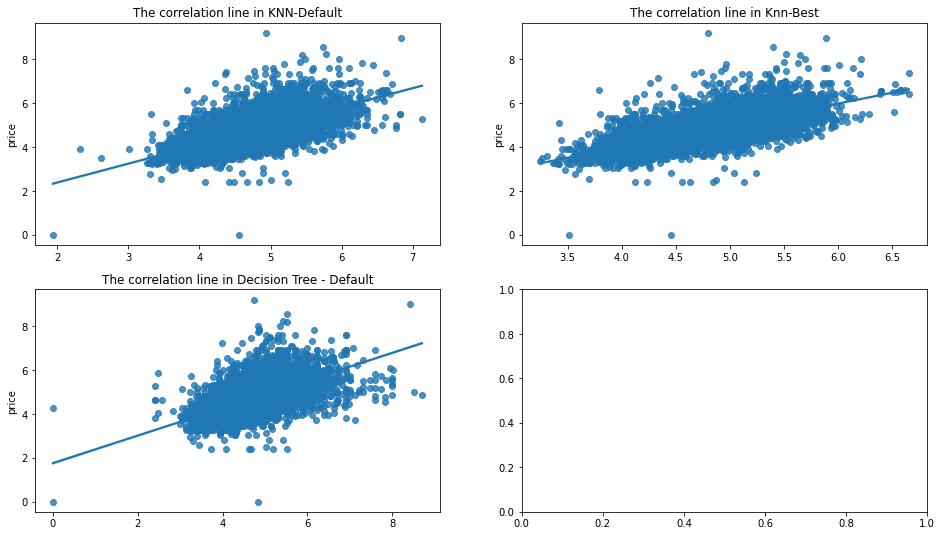

In [175]:
prediction['Decision Tree - Default'] = tree_model_prediction
plot_all_r2()

In [176]:
error_list['Decision Tree - Default'] = [tree_mse, tree_r2]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,-0.268403,0.482161
MSE KNN-Best,0.212275,0.551298
Decision Tree - Default,0.353373,0.253050


### Apply Hyperparameter tuning and cross validation

In [177]:
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
}
tree_grid = GridSearchCV(tree_model, parameters, refit = True, verbose = 1, n_jobs=-1, cv=5, scoring="neg_mean_squared_error") 
tree_grid.fit(X, y)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=1)

In [178]:
print(f"Best parameters are {tree_grid.best_params_}") 
print("Best MSE is {}".format(tree_grid.best_score_ * -1))

Best parameters are {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best MSE is 0.24710117827944061


### Decision Tree after Hyperparameter tuning

In [179]:
tree_model_best = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 4, min_samples_split = 4)
tree_model_best.fit(X_train, y_train) 
tree_model_prediction_best = tree_model_best.predict(X_test)

tree_mse_best = metrics.mean_squared_error(y_test, tree_model_prediction_best)
tree_mae_best = metrics.mean_absolute_error(y_test, tree_model_prediction_best)
tree_rmse_best = np.sqrt(tree_mse_best)
tree_r2_best = metrics.r2_score(y_test, tree_model_prediction_best)

print("Mean Squared Error: {}".format(abs(tree_mse_best)))
print("Mean Absolute Error: {}".format(abs(tree_mae_best)))
print("Root Mean Absolute Error: {}".format(tree_rmse_best))
print("R2 score: {}".format(tree_r2_best))

Mean Squared Error: 0.2220415438232124
Mean Absolute Error: 0.34215656846570686
Root Mean Absolute Error: 0.471212843440427
R2 score: 0.5306545613348492


### Decision Tree with K Fold after Hyperparameter tuning

In [180]:
tree_model_best = tree.DecisionTreeRegressor(max_depth = 7, min_samples_leaf = 4, min_samples_split = 4)
mse = cross_val_score(tree_model_best, X, y,cv=10, scoring='neg_mean_squared_error').mean()
mae = cross_val_score(tree_model_best, X, y,cv=10, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(tree_model_best, X, y,cv=10, scoring='r2').mean()
rmse = np.sqrt(abs(mse.mean()))

print("Mean Squared Error: {}".format(abs(mse)))
print("Mean Absolute Error: {}".format(abs(mae)))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2))

Mean Squared Error: 0.24113167114946132
Mean Absolute Error: 0.3529577929032549
Root Mean Absolute Error: 0.4910515972374607
R2 score: 0.4916172654495556


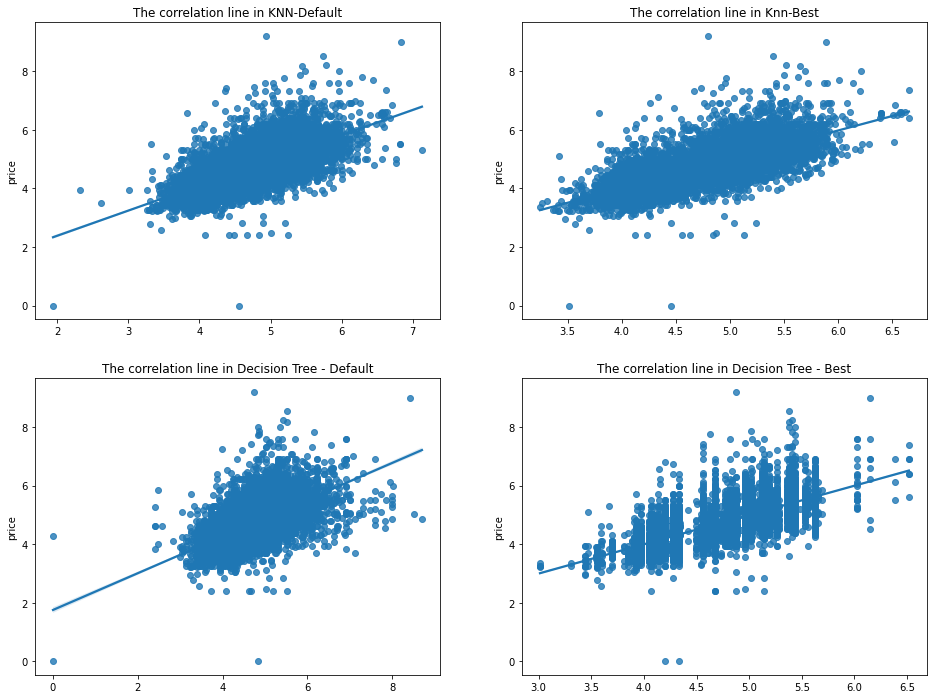

In [181]:
prediction['Decision Tree - Best'] = tree_model_prediction_best
plot_all_r2()

In [182]:
error_list['Decision Tree - Best'] = [tree_mse_best, tree_r2_best]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,-0.268403,0.482161
MSE KNN-Best,0.212275,0.551298
Decision Tree - Default,0.353373,0.253050
Decision Tree - Best,0.222042,0.530655


### Random Forest

In [183]:
forest_model = RandomForestRegressor(random_state=42) #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mse = metrics.mean_squared_error(y_test, forest_model_prediction)
forest_mae = metrics.mean_absolute_error(y_test, forest_model_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = metrics.r2_score(y_test, forest_model_prediction)

print("Mean Squared Error: {}".format(forest_mse))
print("Mean Absolute Error: {}".format(forest_mae))
print("Root Mean Absolute Error: {}".format(forest_rmse))
print("R2 score: {}".format(forest_r2))

Mean Squared Error: 0.19980820263600205
Mean Absolute Error: 0.3224092829420728
Root Mean Absolute Error: 0.4469991080930722
R2 score: 0.5776507994839208


### Random Forest with K Fold

In [184]:
forest_model = RandomForestRegressor(random_state=42) #n_estimators is 100 by default
tree_model = tree.DecisionTreeRegressor()
mse = cross_val_score(forest_model, X, y,cv=10, scoring='neg_mean_squared_error').mean()
mae = cross_val_score(forest_model, X, y,cv=10, scoring='neg_mean_absolute_error').mean()
r2_rf = cross_val_score(forest_model, X, y,cv=10, scoring='r2').mean()
rmse = np.sqrt(abs(mse.mean()))

print("Mean Squared Error: {}".format(abs(mse)))
print("Mean Absolute Error: {}".format(abs(mae)))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2_rf))

[CV 5/5; 1/6] START n_neighbors=5, p=1..........................................
[CV 5/5; 1/6] END ..........n_neighbors=5, p=1;, score=-0.299 total time=   0.9s
[CV 2/5; 3/6] START n_neighbors=10, p=1.........................................
[CV 2/5; 3/6] END .........n_neighbors=10, p=1;, score=-0.218 total time=   1.2s
[CV 4/5; 4/6] START n_neighbors=10, p=2.........................................
[CV 4/5; 4/6] END .........n_neighbors=10, p=2;, score=-0.247 total time=   0.9s
[CV 3/5; 6/6] START n_neighbors=15, p=2.........................................
[CV 3/5; 6/6] END .........n_neighbors=15, p=2;, score=-0.253 total time=   0.9s
[CV 2/5; 2/6] START n_neighbors=5, p=2..........................................
[CV 2/5; 2/6] END ..........n_neighbors=5, p=2;, score=-0.245 total time=   0.8s
[CV 5/5; 2/6] START n_neighbors=5, p=2..........................................
[CV 5/5; 2/6] END ..........n_neighbors=5, p=2;, score=-0.300 total time=   0.6s
[CV 2/5; 4/6] START n_neighb

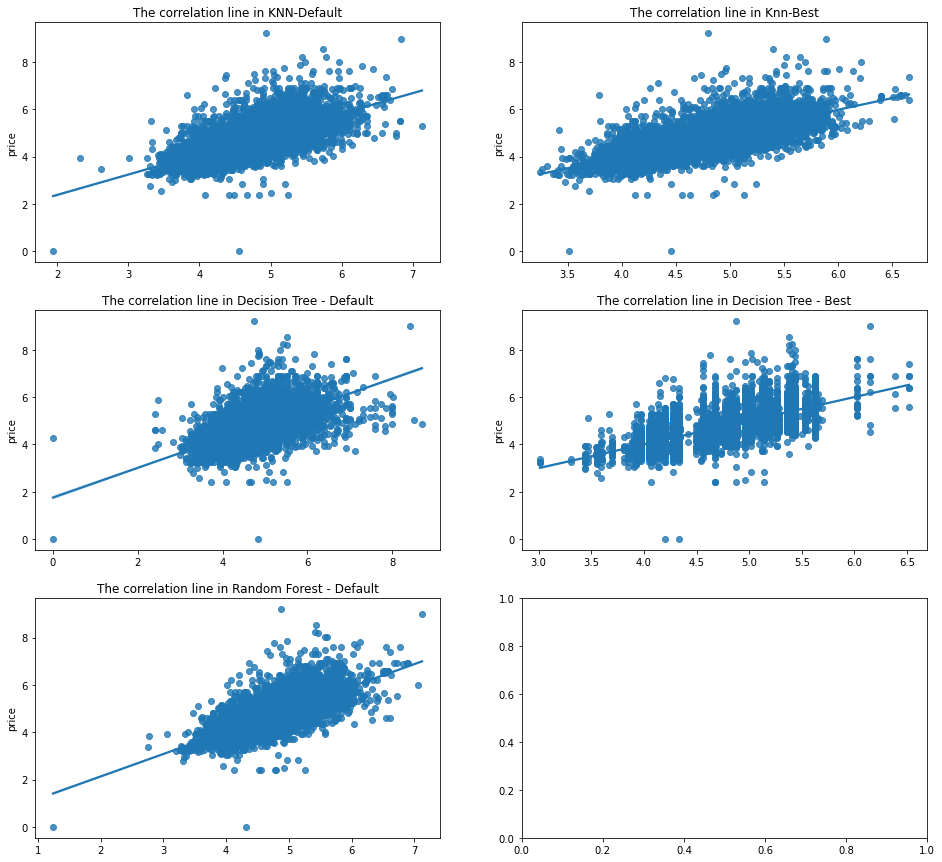

In [185]:
prediction['Random Forest - Default'] = forest_model_prediction
plot_all_r2()

In [186]:
error_list['Random Forest - Default'] = [forest_mse, forest_r2]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,-0.268403,0.482161
MSE KNN-Best,0.212275,0.551298
Decision Tree - Default,0.353373,0.253050
Decision Tree - Best,0.222042,0.530655
Random Forest - Default,0.199808,0.577651


### Linear Regression

#### Before hyperparameter tuning

In [187]:
linear_model = LinearRegression().fit(X_train, y_train)
linear_model_prediction = linear_model.predict(X_test)

linear_mse = metrics.mean_squared_error(y_test, linear_model_prediction)
linear_mae = metrics.mean_absolute_error(y_test, linear_model_prediction)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = metrics.r2_score(y_test, linear_model_prediction)

print("Mean Squared Error: {}".format(linear_mse))
print("Mean Absolute Error: {}".format(linear_mae))
print("Root Mean Absolute Error: {}".format(linear_rmse))
print("R2 score: {}".format(linear_r2))

Mean Squared Error: 0.27748833226418773
Mean Absolute Error: 0.39110339968517815
Root Mean Absolute Error: 0.5267716130014863
R2 score: 0.413452632383557


 ### Linear Regression with K Fold

In [188]:
linear_model = LinearRegression()
mse = cross_val_score(linear_model, X, y,cv=10, scoring='neg_mean_squared_error').mean()
mae = cross_val_score(linear_model, X, y,cv=10, scoring='neg_mean_absolute_error').mean()
r2_li = cross_val_score(linear_model, X, y,cv=10, scoring='r2').mean()
rmse = np.sqrt(abs(mse.mean()))

print("Mean Squared Error: {}".format(abs(mse)))
print("Mean Absolute Error: {}".format(abs(mae)))
print("Root Mean Absolute Error: {}".format(rmse))
print("R2 score: {}".format(r2_li))

Mean Squared Error: 0.2893067153458589
Mean Absolute Error: 0.39428704185632946
Root Mean Absolute Error: 0.5378723968989847
R2 score: 0.3918229241290895


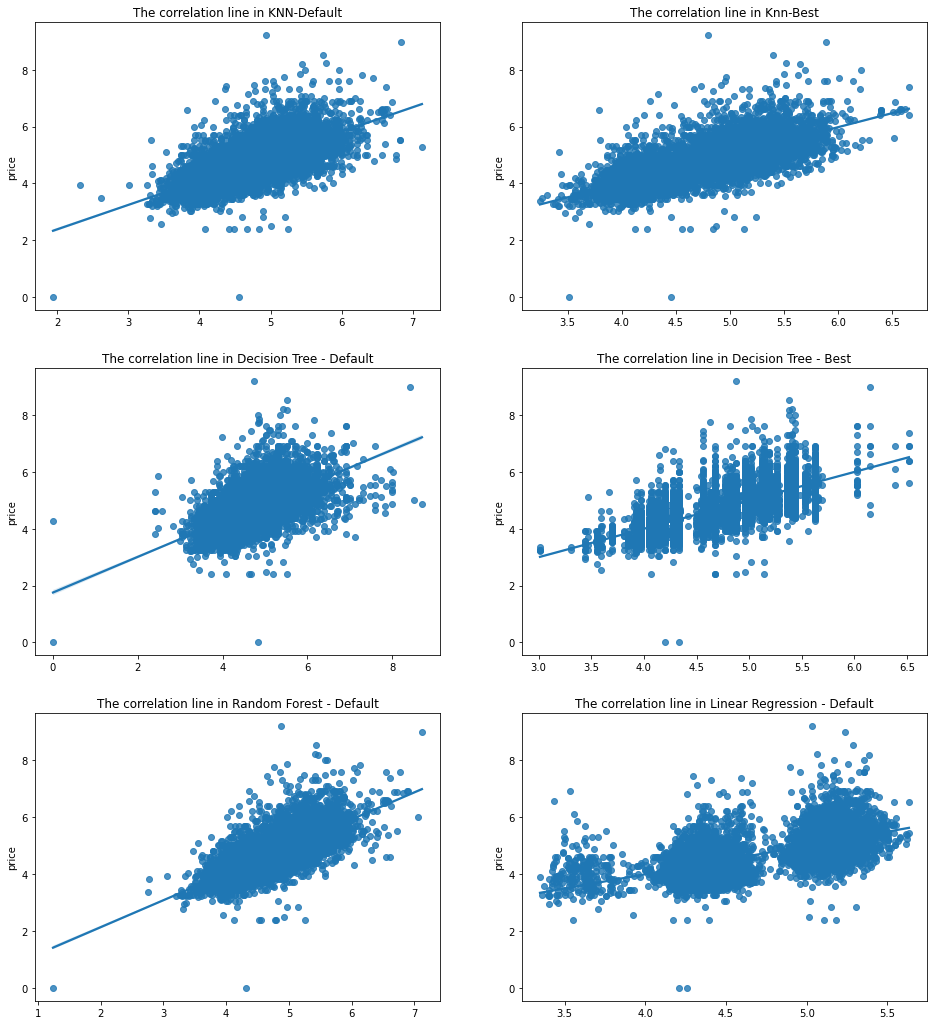

In [189]:
prediction['Linear Regression - Default'] = linear_model_prediction
plot_all_r2()

In [190]:
error_list['Linear Regression - Default'] = [linear_mse, linear_r2]
error_list.T

,Mean Squared Error,R2 Score
KNN Default,-0.268403,0.482161
MSE KNN-Best,0.212275,0.551298
Decision Tree - Default,0.353373,0.253050
Decision Tree - Best,0.222042,0.530655
Random Forest - Default,0.199808,0.577651
Linear Regression - Default,0.277488,0.413453
